## Cost Function for Logistic Regression

Implementing the cost function for logistic regression. This is achieved by computing losses across every points in the training data. These losses are summed over to give the cost of the logistic regression model.

In [4]:
# Importing the dependencies
import numpy as np  # For scientific computation
import matplotlib.pyplot as plt  # For plotting data
from utils_common import  plot_data, sigmoid, dlc

In [2]:
# Creating a dataset to work with
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])  

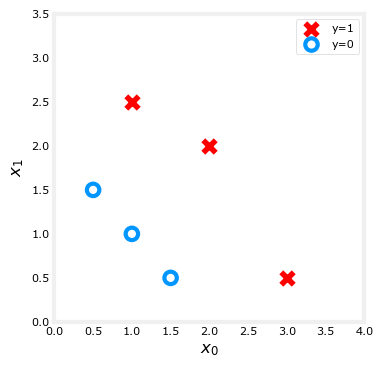

In [5]:
# Helper function for plotting the data
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

The data points with label y = 1 are shown as red crosses, while the data points with label y = 0 are shown as blue circles.

## Cost Function

Loss is defined to apply to one example. Here we combine the losses to form the cost, which includes all the examples.

In [6]:
# Function to calculate cost by looping over all the examples and computing losses for each one.
# The sum of these losses are returned as cost of the logistic regression model.
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

In [7]:
# Testing the cost function
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


## Testing the cost function on different parameter values (decision boundary)

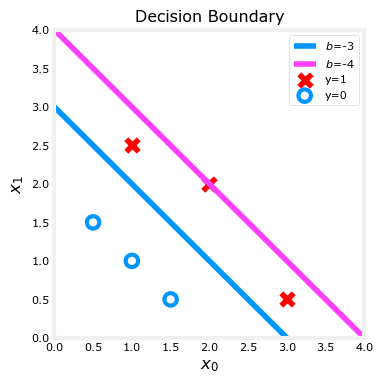

In [8]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

Here, two different parameter choices gave us two different decision boundaries. However, it is clear from visualization that the cost of the logistic regression model highly depends on the values of parameters (decision boundary) we choose. The more inaccurate decision boundary, the higher the cost J.

In [9]:
# Computing cost for both these parameter choices (decision boundary)
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


As expected, the cost function reflects subtle changes when changes are imposed in the parameter values (decision boundary). So, the model with parameter values b = -4 and w0, w1 = 1 is indeed the worst choice for the data as compared to the model with parameter values b = -3 and w0, w1 = 1